# 

                                                SKILL ACTIVITY NO: 4
    Date: 28/07/2021
    Name: Aditi Rajesh Dalavi
    Email_id: aditidalavi7337@gmail.com
    Module Code: ML_13

                                        Title: Analysis of titanic data.
    Skills/Competencies to be acquired:

    Accepting values from users
            1) Create the user defined function to handle null values.
            2) Handle null values using sklearn imputer package
            3) change categorical values to numeric using:  np.where(), label encoder, 
                get dummies, one hot encoder and column transformation
            4) check if data is clean and ready to implement algorithm
            5) implement leave one out , k-fold, stratified k-fold, train test split
            6) scale the data (Standard scaler, MinMax ...etc... )
            7) Implement suitable machine learning algorithm.
            8) compare different algorithm


    What is the purpose of this activity?
    1. To handle null values.
    2. Use sklearn imputer package
    3. change categorical values to numeric 
    4. check if data is clean and ready to implement algorithm
    5. implement leave one out , k-fold, stratified k-fold, train test split
    6. scale the data
    7. Implement suitable machine learning algorithm.
    8. compare different algorithm

    What resources / materials / equipment / tools did you use for this activity?

    Python, matplotlib, sklearn,stats, scipy etc
    
    What skills did you acquire?
    Developing logic 
    1.Checking  all loopholes while executing the code.
    2.Use sklearn imputer package
    3. change categorical values to numeric 
    4. check if data is clean and ready to implement algorithm
    5. implement leave one out , k-fold, stratified k-fold, train test split
    6. scale the data
    7. Implement suitable machine learning algorithm.
    8. compare different algorithm

    Time taken to complete the activity?
    2 days.

In [1]:
#importing library:
import pandas as pd
import numpy as np

In [2]:
#reading the data:
data =  pd.read_csv(r"C:\Users\aditi\Desktop\ML 13\ml pandas\New folder\datasets\titanic_train.csv ")
# viewing the data head:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City.
There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

The variables on our extracted dataset are pclass, survived, name, age, embarked,home.dest, room, ticket, boat, and sex. pclass refers to passenger class (1st, 2nd, 3rd),and is a proxy for socio-economic class. Age is in years, and some infants hadfractional values. The data frame has missing data and includes records forthe crew, but age is dichotomized at adult vs. child.

Thedata frame describes the survival status of individual passengers on the Titanic. The data frame does not contain information for the crew, but it does contain actual and estimated ages for almost 80% of the passengers.

##### Columns in the data :
Pclass : Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survived : Survival (0 = No; 1 = Yes)

name : Name of the passenger

sex: Gender of passenger 

age: Age of passenger

sibsp : Number of Siblings/Spouses Aboard

parch : Number of Parents/Children Aboard

ticket : Ticket Number

fare : Passenger Fare (British pound)

cabin : Cabin

embarked : Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
# displaying null values column-wise:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### As we can see Age, cabin, embarked has null values.

In [4]:
# defining a function for age column for replacing nan values with age approximation:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [5]:
# implementing the defined funtion in age column:
data['Age'] = data[['Age', 'Pclass']].apply(age_approx, axis=1)

In [6]:
# checking the implementation of the funtion:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### null values for age column has been removed.


In [7]:
#replacing the input of sex column from male and female to 0,1:
data['Sex_cleaned'] = np.where(data['Sex']== 'male',0,1)
data['Sex_cleaned']


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_cleaned, Length: 891, dtype: int32

#### replaced male and female input of sex column to 0,1

In [8]:
#replacing the input of embarked from S,C,Q to 0,1,2:
data['Embarked_cleaned'] = np.where(data['Embarked']== 'S',0,
                           np.where(data['Embarked']== 'C',1,
                           np.where(data['Embarked']== 'Q',2,3)
                                   )
                                   )

data['Embarked_cleaned']                                    

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked_cleaned, Length: 891, dtype: int32

In [9]:
#importing label encoder:
from sklearn.preprocessing import LabelEncoder

In [10]:
# defining encoder:
lb= LabelEncoder()

In [11]:
# fitting cabin column fron data in label encoder:
data['Cabin'] = lb.fit_transform(data['Cabin'])
data['Cabin']

0      147
1       81
2      147
3       55
4      147
      ... 
886    147
887     30
888    147
889     60
890    147
Name: Cabin, Length: 891, dtype: int32

#### hence all nan values has been replaced.

In [12]:
# displaying all unique values of cabin column:
data['Cabin'].unique()

array([147,  81,  55, 129, 145,  49, 111,  13,  63,  41, 101,  23,  71,
        21,  80, 142, 140, 122,  12,  91,  98,  52,  36, 116, 138, 107,
        45, 141,  61, 123,  18,  14,  69, 144,   9,  28,  43,   8, 103,
        93,  87,  78, 102,  83,  40, 134,  46,  57,  89,  54, 113,   3,
        31,  90,  62,  51,  74, 125,  72,  35,  76, 124,  65,  17,  56,
        85, 127, 146,  59, 104,  24, 131,  79,  47, 115, 128,  10,  50,
        53,  86, 126,  97, 117, 133,   1,  25,  64,  96,  42, 121, 106,
        39,  88,  26,  27,  20,  82,  77,   2,  48,  75,   0, 135,  29,
         4,  95, 110, 114,   5,  33,   7, 108, 132,  58,  38,  34, 109,
        32,  19, 139,  73, 120,  84,  66, 137,  15, 105,  67, 100, 118,
        92, 136, 143,  22, 112,  44,  94,  11,  16,  37, 130,  68,  99,
       119,   6,  70,  30,  60])

In [13]:
# checking the null values again:
data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin               0
Embarked            2
Sex_cleaned         0
Embarked_cleaned    0
dtype: int64

#### hence all nan value from cabin column has been replaced using label encoder.

In [14]:
# fitting embarked_cleaned column from data in label encoder:
data['Embarked_cleaned'] = lb.fit_transform(data['Embarked'])
# displaying the uniques of embarked cleaned values:
data['Embarked_cleaned'].unique()

array([2, 0, 1, 3])

#### hence the null values from embarked_cleaned are also replaced.

In [15]:
# displaying head of data to check:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cleaned,Embarked_cleaned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,147,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,81,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,147,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,55,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,147,S,0,2


In [16]:
# checking data columns of the data:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_cleaned',
       'Embarked_cleaned'],
      dtype='object')

#### here as we can see,
#### columns: sex aand sex_cleaned, embarked and embarked_cleaned, are present. 
#### hence, droping the original columns along with name, passenger ID, cabin, ticket because these columns doesnt affect the data as such.

In [17]:
# dropping the columns:
data= data[['Survived', 
            'Pclass',  
            'Sex_cleaned', 
            'Age', 
            'SibSp',
            'Parch', 
            'Fare',
            'Embarked_cleaned']].dropna(axis=0, how= 'any')

#### hence dropped the required columns

In [18]:
# creating new data frame with dummy: 
data1 = pd.get_dummies(data, columns = ['Sex_cleaned','Pclass','Embarked_cleaned'])
data1

,Survived,Age,SibSp,Parch,Fare,Sex_cleaned_0,Sex_cleaned_1,Pclass_1,Pclass_2,Pclass_3,Embarked_cleaned_0,Embarked_cleaned_1,Embarked_cleaned_2,Embarked_cleaned_3
0,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,0,1,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,0,1,0,0,0,1,0
887,1,19.0,0,0,30.0000,0,1,1,0,0,0,0,1,0
888,0,24.0,1,2,23.4500,0,1,0,0,1,0,0,1,0
889,1,26.0,0,0,30.0000,1,0,1,0,0,1,0,0,0


#### created new dataframe in which we separated:

#### sex_cleaned as sex_cleaned_0, sex_cleaned_1 ; 
#### pclass as pclass_1,pclass_2,pclass_3 ; 
#### Embarked_cleaned as Embarked_cleaned_0,Embarked_cleaned_1, Embarked_cleaned_2, Embarked_cleaned_3.  

In [19]:
# checking the columns of data1:
data1.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_cleaned_0',
       'Sex_cleaned_1', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_cleaned_0', 'Embarked_cleaned_1', 'Embarked_cleaned_2',
       'Embarked_cleaned_3'],
      dtype='object')

In [20]:
# finding the correlation of the data:
data1.corr()

,Survived,Age,SibSp,Parch,Fare,Sex_cleaned_0,Sex_cleaned_1,Pclass_1,Pclass_2,Pclass_3,Embarked_cleaned_0,Embarked_cleaned_1,Embarked_cleaned_2,Embarked_cleaned_3
Survived,1.000000,-0.047255,-0.035322,0.081629,0.257307,-0.543351,0.543351,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.155660,0.060095
Age,-0.047255,1.000000,-0.243526,-0.171095,0.123784,0.078421,-0.078421,0.384431,0.029242,-0.355026,0.040700,-0.081658,0.007763,0.075009
SibSp,-0.035322,-0.243526,1.000000,0.414838,0.159651,-0.114631,0.114631,-0.054582,-0.055932,0.092548,-0.059528,-0.026354,0.070941,-0.022508
Parch,0.081629,-0.171095,0.414838,1.000000,0.216225,-0.245489,0.245489,-0.017633,-0.000734,0.015790,-0.011069,-0.081228,0.063036,-0.022467
Fare,0.257307,0.123784,0.159651,0.216225,1.000000,-0.182333,0.182333,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.166603,0.045646
Sex_cleaned_0,-0.543351,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-1.000000,-0.098013,-0.064746,0.137143,-0.082853,-0.074115,0.125722,-0.064296
Sex_cleaned_1,0.543351,-0.078421,0.114631,0.245489,0.182333,-1.000000,1.000000,0.098013,0.064746,-0.137143,0.082853,0.074115,-0.125722,0.064296
Pclass_1,0.285904,0.384431,-0.054582,-0.017633,0.591711,-0.098013,0.098013,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.170379,0.083847
Pclass_2,0.093349,0.029242,-0.055932,-0.000734,-0.118557,-0.064746,0.064746,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.192061,-0.024197
Pclass_3,-0.322308,-0.355026,0.092548,0.015790,-0.413333,0.137143,-0.137143,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.009511,-0.052550


#### 
#### Positive and Negative values denote Positive and Negative correlation. 
#### The first row of the data shows the correlation of each variable with the Target variable ‘Survived’.
#### For building a good predictive model, we are interested in variables that influence the target variable “Survived”. 
#### Positively or negatively. We need to consider the values that are both too high and too low.

In [21]:
#importing libraries to ploat heat map of the correlation:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sys
sys.set(style='white',color_codes=True)
sys.set(font_scale=1.5)

<AxesSubplot:>

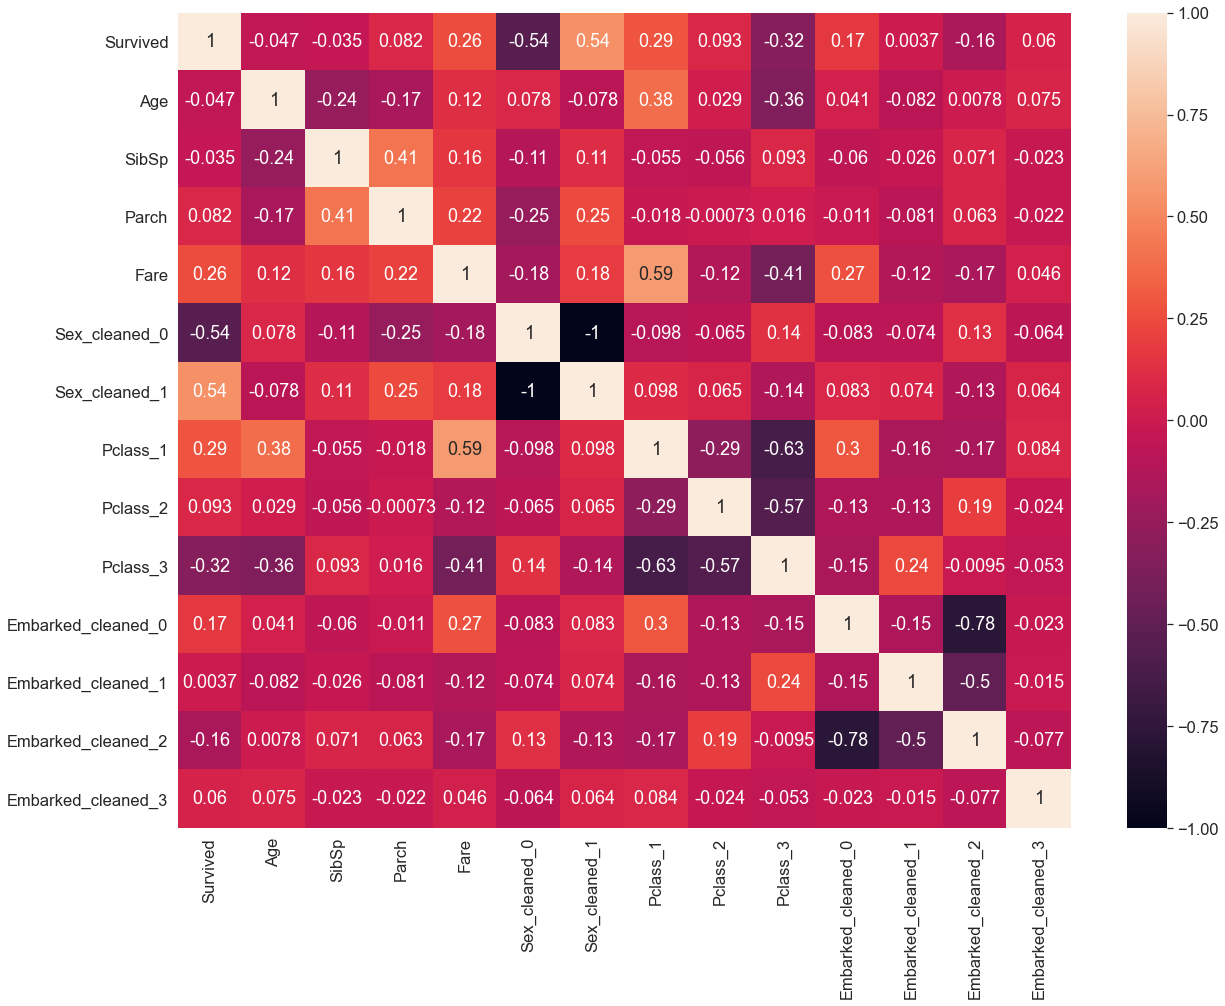

In [22]:
# Checking for independence between features
plt.figure(figsize=(20,15))
sys.heatmap(data1.corr(),annot= True)  

In [23]:
# creating feature column and y:
X = data1[['Age', 'SibSp', 'Parch', 'Fare', 'Sex_cleaned_0',
       'Sex_cleaned_1', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_cleaned_0', 'Embarked_cleaned_1', 'Embarked_cleaned_2',
       'Embarked_cleaned_3']]
y = data1['Survived']

#### splited data into dependent and independent variables.

In [24]:
#displaying x values:
X = X.values
print(X)

[[22.  1.  0. ...  0.  1.  0.]
 [38.  1.  0. ...  0.  0.  0.]
 [26.  0.  0. ...  0.  1.  0.]
 ...
 [24.  1.  2. ...  0.  1.  0.]
 [26.  0.  0. ...  0.  0.  0.]
 [32.  0.  0. ...  1.  0.  0.]]


In [25]:
# displaying y values:
y = y.values
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [26]:
# importing libraries for k-fold, leave one out and stratified k fold:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
# creating leave one out function:
cv = LeaveOneOut()

In [28]:
# creating knn model function for the test:
knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
# displaying the cross validation score(accuracy) of knn model:
scores = cross_val_score(knn, X, y, scoring='neg_mean_absolute_error',
                         cv=cv)
scores

array([-0., -0., -0., -0., -0., -0., -1., -1., -0., -1., -0., -1., -0.,
       -0., -1., -1., -0., -1., -0., -1., -1., -1., -0., -1., -1., -1.,
       -0., -1., -0., -0., -0., -0., -0., -1., -1., -0., -1., -0., -0.,
       -0., -0., -0., -0., -0., -1., -0., -0., -0., -1., -0., -1., -0.,
       -0., -0., -0., -1., -1., -0., -0., -0., -0., -0., -0., -0., -0.,
       -1., -1., -0., -1., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -1., -0., -0., -1., -1., -0., -0., -0., -0., -0.,
       -0., -1., -0., -0., -0., -0., -0., -1., -1., -0., -0., -0., -0.,
       -0., -0., -0., -1., -0., -1., -1., -1., -0., -0., -0., -0., -0.,
       -0., -1., -1., -0., -0., -1., -0., -1., -0., -0., -1., -1., -1.,
       -0., -0., -0., -0., -0., -0., -0., -1., -0., -1., -1., -0., -0.,
       -0., -0., -0., -0., -0., -0., -1., -0., -0., -0., -0., -0., -1.,
       -0., -0., -0., -0., -0., -1., -0., -0., -1., -1., -0., -0., -0.,
       -1., -0., -0., -0., -0., -0., -0., -0., -1., -0., -0., -0

#### As the y (ie survived) was in the form of 0,1 (survived or died) hence the displayed values are in 0,1.

In [30]:
# importing libraries for leave one out accuracy. 
from numpy import mean
from numpy import absolute

# score for leave one out:
mean(absolute(scores))

0.27048260381593714

#### 27.04% of accuracy is achieved by this.

# 
##### alternate method for leave one out:

In [31]:
# creating for loop to perform leave one out:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
y_true, y_pred = list(), list()
for train1, test1 in cv.split(X):
# split data in train and test:
    X_train,X_test = X[train1, :], X[test1, :]
    y_train, y_test = y[train1], y[test1]
# using knn model for this:

    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    
# evaluatating the model

    y1 = model.predict(X_test)

    y_true.append(y_test)
    
    y_pred.append(y1)
    
# calculate accuracy
    acc = metrics.accuracy_score(y_true, y_pred)
# creating condition for the accuracy:    
    if acc>0.7:
        print(test1,'Accuracy: %.3f' % acc)



[0] Accuracy: 1.000
[1] Accuracy: 1.000
[3] Accuracy: 0.750
[4] Accuracy: 0.800
[5] Accuracy: 0.833
[6] Accuracy: 0.714
[260] Accuracy: 0.701
[780] Accuracy: 0.700
[781] Accuracy: 0.701
[783] Accuracy: 0.700
[784] Accuracy: 0.701
[785] Accuracy: 0.701
[786] Accuracy: 0.700
[787] Accuracy: 0.701
[788] Accuracy: 0.701
[790] Accuracy: 0.700
[796] Accuracy: 0.700
[803] Accuracy: 0.700
[806] Accuracy: 0.700
[807] Accuracy: 0.700
[808] Accuracy: 0.701
[809] Accuracy: 0.701
[810] Accuracy: 0.702
[811] Accuracy: 0.702
[812] Accuracy: 0.702
[813] Accuracy: 0.703
[814] Accuracy: 0.703
[815] Accuracy: 0.703
[816] Accuracy: 0.703
[817] Accuracy: 0.702
[818] Accuracy: 0.702
[819] Accuracy: 0.702
[820] Accuracy: 0.702
[821] Accuracy: 0.701
[822] Accuracy: 0.701
[823] Accuracy: 0.701
[824] Accuracy: 0.701
[825] Accuracy: 0.701
[826] Accuracy: 0.700
[827] Accuracy: 0.700
[833] Accuracy: 0.700
[834] Accuracy: 0.701
[835] Accuracy: 0.701
[836] Accuracy: 0.701
[837] Accuracy: 0.702
[838] Accuracy: 0.702


In [32]:
# checking the shape:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(890, 13)
(1, 13)
(890,)
(1,)


In [33]:
## Stratified K-Folds cross-validator, this provides train/test indices to split data in train/test sets:

skf = StratifiedKFold(n_splits=10, random_state=None)

In [34]:
# instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

In [35]:
# checking the accuracy via K-fold and also finding mean accuracy of all:
cv_results =  cross_val_score(knn, X, y, cv=skf, scoring='accuracy')

print('K-Fold accuracy scores : \n', cv_results)
print('Mean score : \n', cv_results.mean())

K-Fold accuracy scores : 
 [0.7        0.69662921 0.68539326 0.73033708 0.7752809  0.71910112
 0.74157303 0.73033708 0.62921348 0.78651685]
Mean score : 
 0.719438202247191


##### mean accuracy is 71.94% after K-fold.

In [36]:
#importing cross validate for validation of the accuracy:
from sklearn.model_selection import cross_validate

# validating accuracy, presision and recall:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro'}

scores = cross_validate(knn, X, y, scoring=scoring, cv=8, return_train_score=True)



In [37]:
print('Score keys : \n', scores.keys())
print(scores['test_acc'])  

Score keys : 
 dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_prec_macro', 'train_prec_macro', 'test_rec_micro', 'train_rec_micro'])
[0.6875     0.70535714 0.71428571 0.75675676 0.69369369 0.7027027
 0.71171171 0.75675676]


##### the accuracy acorrding to the dictionary has been displayed.

In [38]:
# importing min-max scaler for scaling of the data:
from sklearn.preprocessing import MinMaxScaler
# defining the data:
scaler=MinMaxScaler()
# fitting X in the scale:
X = scaler.fit_transform(X)
# printing X after scaling:
print(X)
# checking the shape after scaling:
print(X.shape)

[[0.27117366 0.125      0.         ... 0.         1.         0.        ]
 [0.4722292  0.125      0.         ... 0.         0.         0.        ]
 [0.32143755 0.         0.         ... 0.         1.         0.        ]
 ...
 [0.2963056  0.125      0.33333333 ... 0.         1.         0.        ]
 [0.32143755 0.         0.         ... 0.         0.         0.        ]
 [0.39683338 0.         0.         ... 1.         0.         0.        ]]
(891, 13)


In [39]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X[:,1] = lb.fit_transform(X[:,1])
print(X)
print(X.shape)

[[0.27117366 1.         0.         ... 0.         1.         0.        ]
 [0.4722292  1.         0.         ... 0.         0.         0.        ]
 [0.32143755 0.         0.         ... 0.         1.         0.        ]
 ...
 [0.2963056  1.         0.33333333 ... 0.         1.         0.        ]
 [0.32143755 0.         0.         ... 0.         0.         0.        ]
 [0.39683338 0.         0.         ... 1.         0.         0.        ]]
(891, 13)


In [40]:
X.shape

(891, 13)

In [41]:
# split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [42]:
# displaying X_train:
X_train

array([[0.01985423, 3.        , 0.16666667, ..., 0.        , 1.        ,
        0.        ],
       [0.63558683, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.560191  , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.45966323, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.14551395, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.44709726, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [43]:
# displaying y_train:
y_train

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [44]:
#displaying x_test:
X_test

array([[0.43453129, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.24604172, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.32143755, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.50992712, 0.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.3842674 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.2963056 , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [45]:
# displaying y_test:
y_test

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1], dtype=int64)

In [46]:
# displaying the shape of the test and train data:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 13)
(268, 13)
(623,)
(268,)


In [47]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression

# defining logistic regression:
lr1 = LogisticRegression()


In [48]:
# fitting the data into logistic regression:
lr1.fit(X_train, y_train)

LogisticRegression()

In [49]:
# predicting y:
y_pred_lr1 = lr1.predict(X_test)
y_pred_lr1

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [50]:
# displaying the coefficients of logistic regression:
lr1.coef_

array([[-1.54861801, -0.47366085, -0.34856103,  0.16842647, -1.33136775,
         1.33006103,  0.8888207 ,  0.05988994, -0.95001736,  0.26790172,
         0.01702942, -0.42850984,  0.14227197]])

In [51]:
# checking the probability of prediction:
pr_lr1=lr1.predict_proba(X_test)[:,1]
pr_lr1

array([0.09899254, 0.1282417 , 0.11577359, 0.92998492, 0.86333106,
       0.13046456, 0.11777225, 0.19317791, 0.10434527, 0.12398342,
       0.26854219, 0.90056103, 0.66330209, 0.40074889, 0.25337491,
       0.25272246, 0.03025251, 0.04289418, 0.54343046, 0.21450756,
       0.07833981, 0.37291775, 0.72630414, 0.07675208, 0.26092119,
       0.12834449, 0.12827387, 0.53544217, 0.17839139, 0.92253225,
       0.86210558, 0.25272246, 0.69611527, 0.03937521, 0.78380746,
       0.11981359, 0.66096232, 0.18074261, 0.17527908, 0.10434744,
       0.08096844, 0.16162464, 0.11981778, 0.23017387, 0.25321887,
       0.43896795, 0.12610813, 0.12611356, 0.96499297, 0.26123067,
       0.28386489, 0.14161896, 0.18067157, 0.40060478, 0.24903268,
       0.94776158, 0.04452074, 0.79632216, 0.9380367 , 0.05039591,
       0.1724834 , 0.9059359 , 0.7526439 , 0.53926606, 0.04893027,
       0.13270337, 0.2989546 , 0.1071111 , 0.10076937, 0.53587456,
       0.30520805, 0.08750006, 0.11751119, 0.06211045, 0.82100

In [52]:
# finding accuracy of trained data by logistic regression:
lr1.score(X_train,y_train)

0.8025682182985554

### accuracy of trained data by logistic regression is 0.8025.

In [53]:
# rounding the accuracy of trained data:
lr1_trainacc = round(lr1.score(X_train,y_train)*100,2)
lr1_trainacc

80.26

### accuracy of trained data by logistic regression is 80.26%

In [54]:
# finding accuracy of test data by logistic regression:
lr1.score(X_test,y_test)

0.8059701492537313

### accuracy of test data by logistic regression is 0.8059

In [55]:
#rounding accuracy of test data :
lr1_testacc = round(lr1.score(X_test,y_test)*100,2)
lr1_testacc

80.6

### accuracy of test data by logistic regression is 80.6%

In [56]:
# importing libraries for finding confusion matrix:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [57]:
# finding confusion matrix:
lr_cm= metrics.confusion_matrix(y_test, y_pred_lr1)
lr_cm

array([[150,  24],
       [ 28,  66]], dtype=int64)

### Here, 150 is True Negative (TN),
### 66 is True Positive (TP)
### 24 is False Positive (FP) .
### 28 is False Negative (FN) 

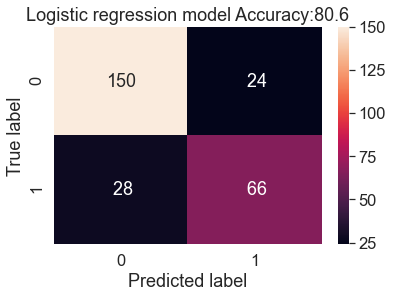

In [58]:
# plotting confusion matrix along with accuracy:
plt.figure(figsize=(6, 4))
sys.heatmap(metrics.confusion_matrix(y_test, y_pred_lr1), annot=True, fmt = '3.0f')
plt.title('Logistic regression model Accuracy:{0:0}'.format(round(lr1.score(X_test,y_test)*100,2)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [59]:
# calculating accuracy with the help of metrics library:
lr_acc= metrics.accuracy_score(y_test, y_pred_lr1)
lr_acc

0.8059701492537313

### accuracy of test data by logistic regression with the help of metrics library is 80.59%

In [60]:
# printing classification report :
lr_cr=classification_report(y_test, y_pred_lr1)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       174
           1       0.73      0.70      0.72        94

    accuracy                           0.81       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.81      0.80       268



#### High recall, low precision: This means that most of the are correctly recognized (low FN) but there are a lot of false positives.

#### Low recall, high precision: This shows that we miss a lot of positive (high FN) but those we predict as positive are indeed positive (low FP)


0.847548300317926


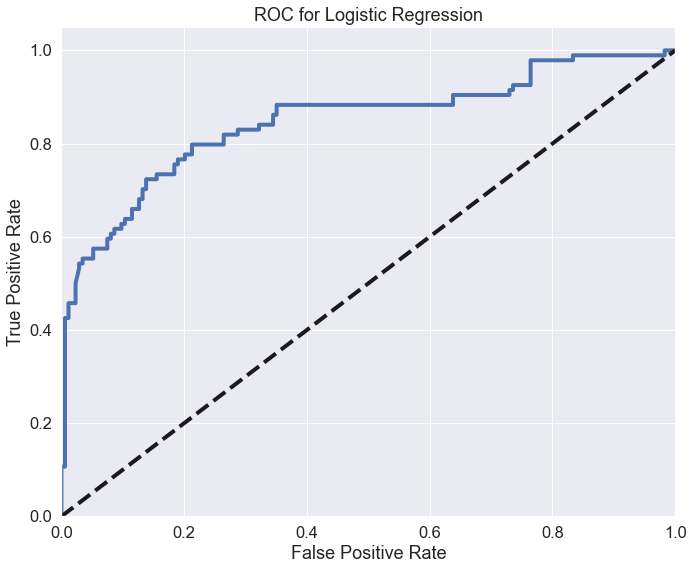

In [61]:
from sklearn.metrics import roc_curve, auc
y_score = lr1.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Logistic Regression', fontsize= 18)
plt.show()

##### The ROC (Receiver Operating Characteristics) curve is a graphical representation of the performnace of the classifier and it shows the performance of our model rises well above the diagonal line.
##### This indicates that our logistic regression model performs better than just a random guess. 
##### The logistic regression model delivers a whooping 0.84 accuracy interms of predicting the survival.


In [62]:
#importing knn :
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# defining the neighbors:
knn = KNeighborsClassifier(n_neighbors= 5)

In [64]:
# fitting trained data into knn model:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
# predicting y by knn model:
y_pred_knn = knn.predict(X_test)

In [66]:
# displaying y predictions:
y_pred_knn

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [67]:
# calculating accuracy of trained model:
knn.score(X_train,y_train)

0.8378812199036918

#### accuracy of trained data is 0.837

In [68]:
# rounding the accuracy of trained model:
knn_trainacc = round(knn.score(X_train,y_train)*100,2)
knn_trainacc

83.79

#### accuracy of trained data is 83.7%

In [69]:
# calculating the accuracy of test:
knn.score(X_test,y_test)

0.8208955223880597

#### accuracy of trained data is 0.82089

In [70]:
# rounding accuracy of test data:
knn_testacc = round(knn.score(X_test,y_test)*100,2)
knn_testacc

82.09

#### accuracy of trained data is 82.09%

In [71]:
metrics.confusion_matrix(y_test, y_pred_knn)

array([[154,  20],
       [ 28,  66]], dtype=int64)

### Here, 154 is True Negative (TN),
### 66 is True Positive (TP)
### 20 is False Positive (FP) .
### 28 is False Negative (FN) 

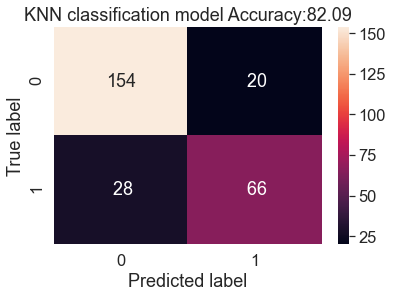

In [72]:
plt.figure(figsize=(6, 4))
sys.heatmap(metrics.confusion_matrix(y_test, y_pred_knn), annot=True, fmt = '3.0f')
plt.title('KNN classification model Accuracy:{0:0}'.format(round(knn.score(X_test,y_test)*100,2)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [73]:
metrics.accuracy_score(y_test, y_pred_knn)

0.8208955223880597

#### by metric the accuracy is 82%

In [74]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       174
           1       0.77      0.70      0.73        94

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



#### High recall, low precision: This means that most of the are correctly recognized (low FN) but there are a lot of false positives.

#### Low recall, high precision: This shows that we miss a lot of positive (high FN) but those we predict as positive are indeed positive (low FP)


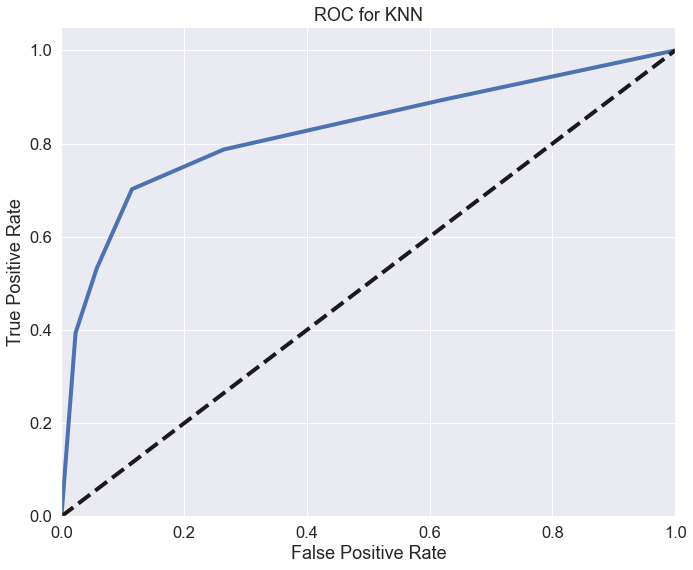

In [75]:
knn = KNeighborsClassifier(n_neighbors= 5)
model_knn = knn.fit(X_train, y_train)
y_predict_proba = model_knn.predict_proba(X_test).tolist()
pro_knn = np.array(y_predict_proba)[:, 1]
fpr1, tpr1, _ = roc_curve(y_test, pro_knn)
    
plt.figure(figsize =[11,9])
plt.plot(fpr1, tpr1, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for KNN', fontsize= 18)
plt.show()

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
gnb = GaussianNB()

In [78]:
gnb.fit(X_train,y_train)

GaussianNB()

In [79]:
y_pred_gnb = gnb.predict(X_test)

In [80]:
gnb.score(X_train,y_train)

0.6548956661316212

In [81]:
gnb_trainacc = round(gnb.score(X_train,y_train)*100,2)
gnb_trainacc

65.49

In [82]:
gnb.score(X_test,y_test)

0.7201492537313433

In [83]:
gnb_testacc = round(gnb.score(X_test,y_test)*100,2)
gnb_testacc

72.01

In [84]:
metrics.confusion_matrix(y_test, y_pred_gnb)

array([[172,   2],
       [ 73,  21]], dtype=int64)

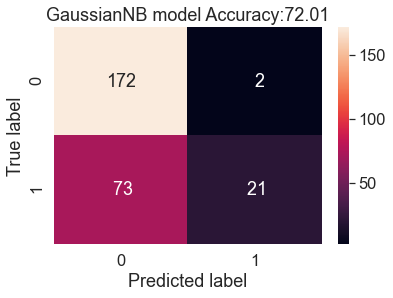

In [85]:
plt.figure(figsize=(6, 4))
sys.heatmap(metrics.confusion_matrix(y_test, y_pred_gnb), annot=True, fmt = '3.0f')
plt.title('GaussianNB model Accuracy:{0:0}'.format(round(gnb.score(X_test,y_test)*100,2)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [86]:
metrics.accuracy_score(y_test, y_pred_gnb)

0.7201492537313433

In [87]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       174
           1       0.91      0.22      0.36        94

    accuracy                           0.72       268
   macro avg       0.81      0.61      0.59       268
weighted avg       0.78      0.72      0.66       268



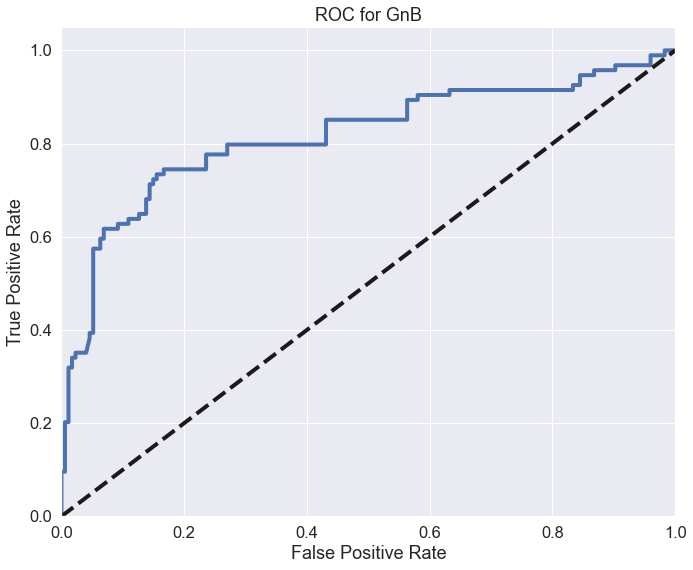

In [88]:
gnb = GaussianNB()
model_gnb = gnb.fit(X_train,y_train)
y_predict_proba = model_gnb.predict_proba(X_test).tolist()
pro = np.array(y_predict_proba)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, pro)
    
plt.figure(figsize =[11,9])
plt.plot(fpr2, tpr2, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for GnB', fontsize= 18)
plt.show()

In [89]:
#importing decision tree library:
from sklearn.tree import DecisionTreeClassifier

In [90]:
# selecting entropy criteria:
dtclf = DecisionTreeClassifier(criterion='entropy')
dtclf

DecisionTreeClassifier(criterion='entropy')

In [91]:
# fitting the data into the model.
dtclf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [92]:
# calculating y_pred:
y_pred_dt = dtclf.predict(X_test)
y_pred_dt

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1], dtype=int64)

In [93]:
# importing grapviz for displaying the tree.
import graphviz
from sklearn.tree import export_graphviz

In [94]:
# defining feature column:
feature_names=data1.drop('Survived',1).columns

In [95]:
# listing important features .
importances = list(dtclf.feature_importances_)
importances

[0.29217377361903274,
 0.03178866664868895,
 0.030578776594965863,
 0.30689280944613373,
 0.0,
 0.22354609244417697,
 0.022064438573661225,
 0.0032498512472685748,
 0.06704264524101594,
 0.009353236544971805,
 0.0,
 0.013309709640084197,
 0.0]

In [96]:
# zipping features with importance: 
feature_importances = [(feature, round(importance, 2)) for 
                       feature, importance 
                       in zip(feature_names, importances)]
feature_importances

[('Age', 0.29),
 ('SibSp', 0.03),
 ('Parch', 0.03),
 ('Fare', 0.31),
 ('Sex_cleaned_0', 0.0),
 ('Sex_cleaned_1', 0.22),
 ('Pclass_1', 0.02),
 ('Pclass_2', 0.0),
 ('Pclass_3', 0.07),
 ('Embarked_cleaned_0', 0.01),
 ('Embarked_cleaned_1', 0.0),
 ('Embarked_cleaned_2', 0.01),
 ('Embarked_cleaned_3', 0.0)]

In [97]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, 
                             key = lambda x: x[1], 
                             reverse = True)
feature_importances

[('Fare', 0.31),
 ('Age', 0.29),
 ('Sex_cleaned_1', 0.22),
 ('Pclass_3', 0.07),
 ('SibSp', 0.03),
 ('Parch', 0.03),
 ('Pclass_1', 0.02),
 ('Embarked_cleaned_0', 0.01),
 ('Embarked_cleaned_2', 0.01),
 ('Sex_cleaned_0', 0.0),
 ('Pclass_2', 0.0),
 ('Embarked_cleaned_1', 0.0),
 ('Embarked_cleaned_3', 0.0)]

In [98]:
#plotting the tree:
dot_data = export_graphviz(dtclf,
                  out_file= None,
                  max_depth = 3,
                  impurity = True,
                  feature_names = feature_importances,
                  class_names = ['Died', 'Survived'],
                  rounded = True,
                  filled= True )

graph = graphviz.Source(dot_data)


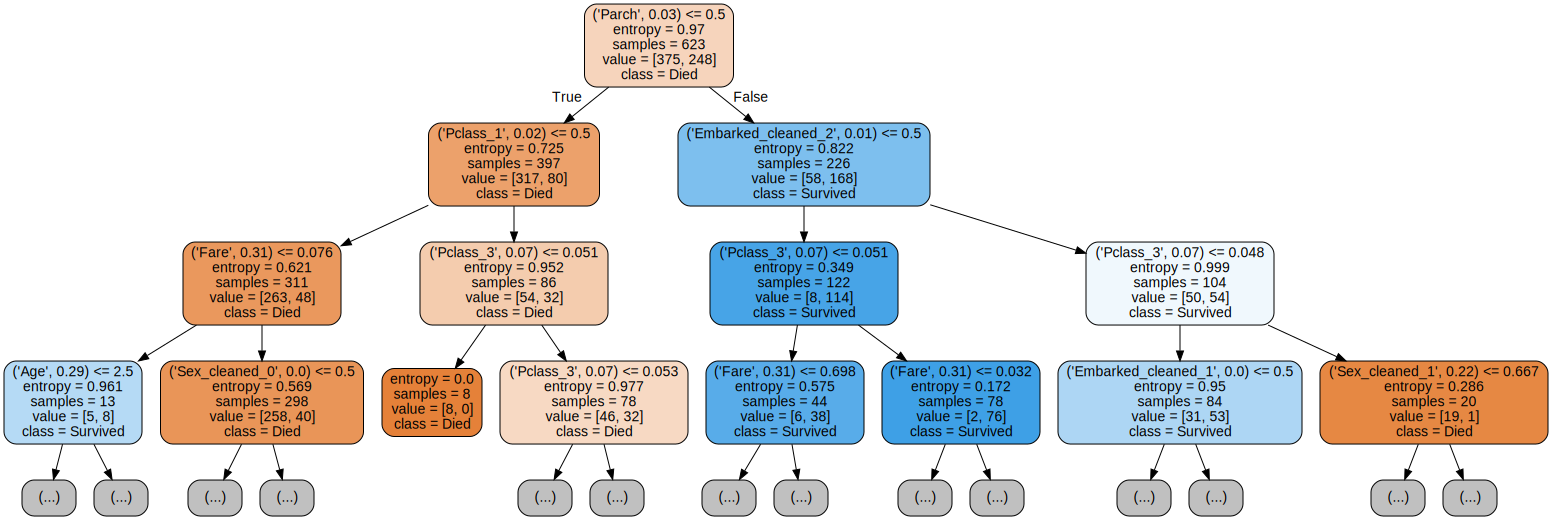

In [99]:
graph

In [100]:
# calculating the accuracy of trained data:
dtclf.score(X_train,y_train)

0.9871589085072231

#### the accuracy of trained data is 0.987.

In [101]:
# the accuracy of trained data:
dtclf_trainacc = round(dtclf.score(X_train,y_train)*100,2)
dtclf_trainacc

98.72

#### the accuracy of trained data is 98.72%

In [102]:
# calculating the accuracy of test data:
dtclf.score(X_test,y_test)

0.7835820895522388

#### the accuracy of test data is 0.77.

In [103]:
#rounding the accuracy of test data:
dtclf_testacc = round(dtclf.score(X_test,y_test)*100,2)
dtclf_testacc

78.36

In [104]:
#### the accuracy of test data is 78%

In [105]:

metrics.confusion_matrix(y_test, y_pred_dt)

array([[145,  29],
       [ 29,  65]], dtype=int64)

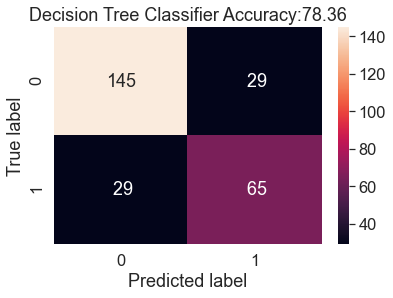

In [106]:
plt.figure(figsize=(6, 4))
sys.heatmap(metrics.confusion_matrix(y_test, y_pred_dt), annot=True, fmt = '3.0f')
plt.title('Decision Tree Classifier Accuracy:{0:0}'.format(round(dtclf.score(X_test,y_test)*100,2)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [107]:
metrics.accuracy_score(y_test, y_pred_dt)

0.7835820895522388

In [108]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       174
           1       0.69      0.69      0.69        94

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



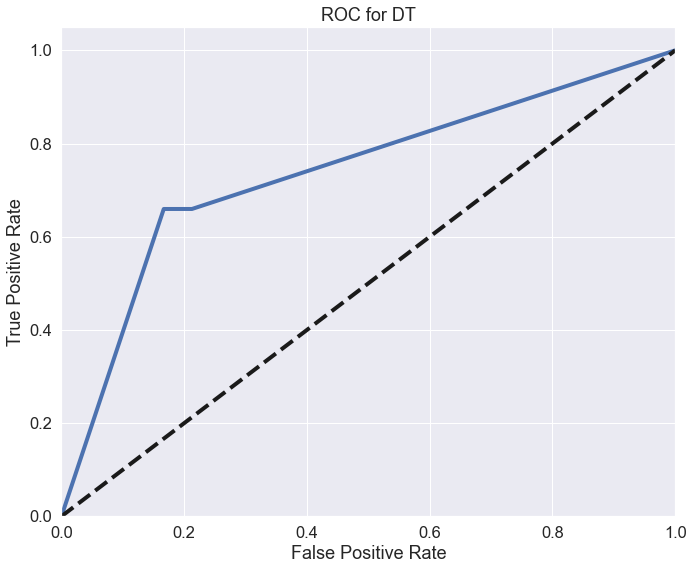

In [109]:
model_dt = dtclf.fit(X_train, y_train)
y_predict_proba = model_dt.predict_proba(X_test).tolist()
pro = np.array(y_predict_proba)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, pro)
    
plt.figure(figsize =[11,9])
plt.plot(fpr3, tpr3, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for DT', fontsize= 18)
plt.show()

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf = RandomForestClassifier(n_estimators=100)

In [112]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [114]:
rf.score(X_test, y_test)

0.8097014925373134

In [115]:
rf_testacc = round(rf.score(X_test, y_test)* 100, 2)
rf_testacc

80.97

In [116]:
rf.score(X_train, y_train)

0.9871589085072231

In [117]:
rf_trainacc = round(rf.score(X_train, y_train) * 100, 2)
rf_trainacc

98.72

In [118]:
metrics.confusion_matrix(y_test, y_pred_rf)

array([[147,  27],
       [ 24,  70]], dtype=int64)

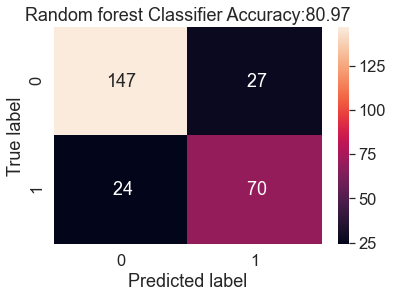

In [119]:
plt.figure(figsize=(6, 4))
sys.heatmap(metrics.confusion_matrix(y_test, y_pred_rf), annot=True, fmt = '3.0f')
plt.title('Random forest Classifier Accuracy:{0:0}'.format(round(rf.score(X_test,y_test)*100,2)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [120]:
metrics.accuracy_score(y_test, y_pred_rf)

0.8097014925373134

In [121]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       174
           1       0.72      0.74      0.73        94

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



In [122]:
tree = rf.estimators_[10]

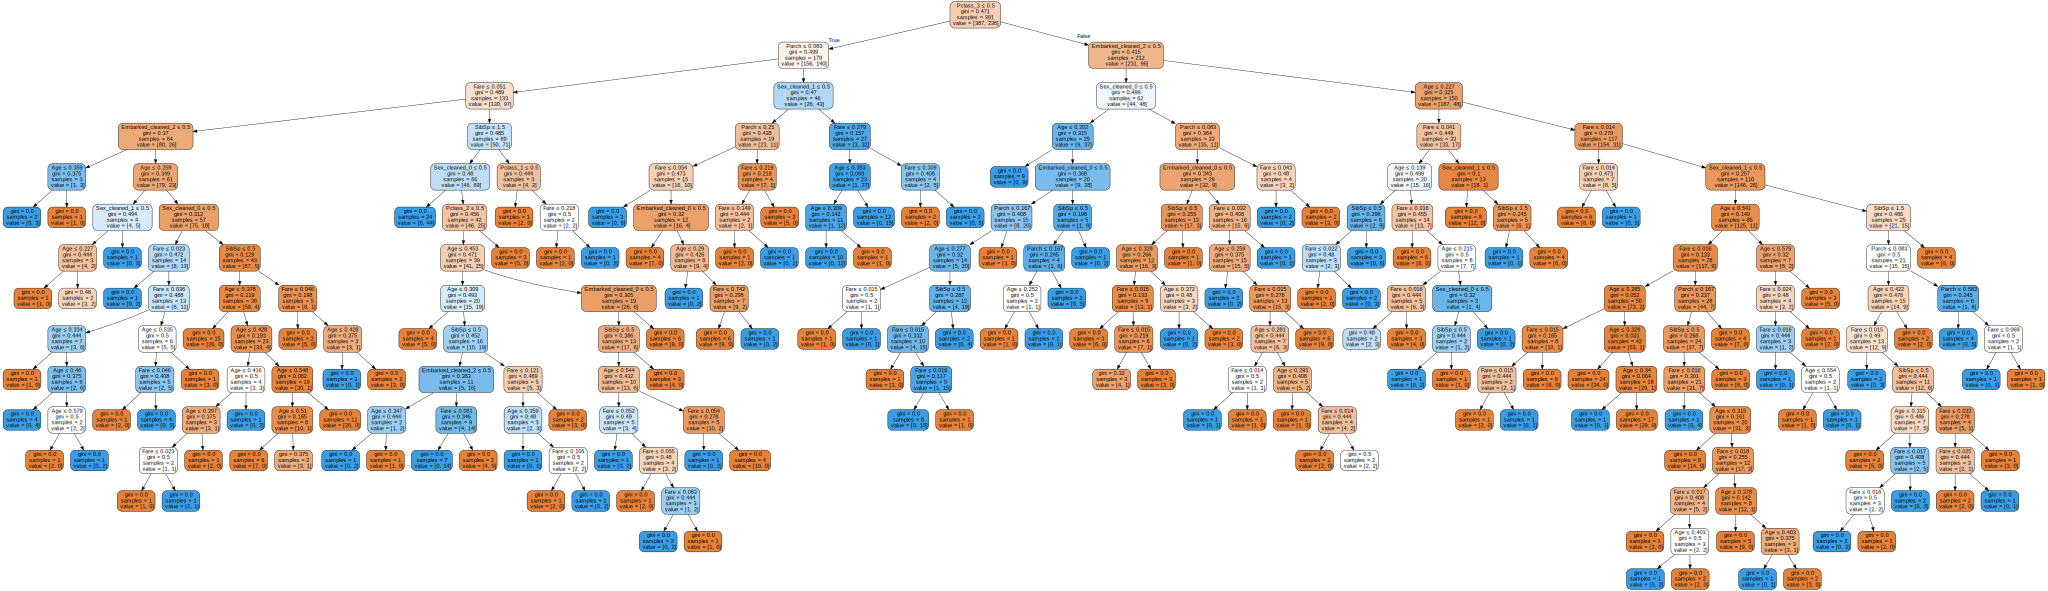

In [123]:
dot_data = export_graphviz(tree, 
                        out_file=None, 
                        feature_names=feature_names,    
                        filled=True, 
                        rounded=True,  
                        special_characters=True)  

graph = graphviz.Source(dot_data)
graph

In [124]:
tree = rf.estimators_[10]

In [125]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
importances

[0.26963566627897,
 0.062132215918698434,
 0.044514112494741076,
 0.2395186628442291,
 0.1524709717835195,
 0.11042257252574654,
 0.026410547189681003,
 0.012726509116316169,
 0.04110717122469181,
 0.015728024330395714,
 0.008003055427823548,
 0.017155302830813964,
 0.00017518803437327932]

In [126]:
feature_importances = [(feature, round(importance, 2)) for 
                       feature, importance 
                       in zip(feature_names, importances)]
feature_importances

[('Age', 0.27),
 ('SibSp', 0.06),
 ('Parch', 0.04),
 ('Fare', 0.24),
 ('Sex_cleaned_0', 0.15),
 ('Sex_cleaned_1', 0.11),
 ('Pclass_1', 0.03),
 ('Pclass_2', 0.01),
 ('Pclass_3', 0.04),
 ('Embarked_cleaned_0', 0.02),
 ('Embarked_cleaned_1', 0.01),
 ('Embarked_cleaned_2', 0.02),
 ('Embarked_cleaned_3', 0.0)]

In [127]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, 
                             key = lambda x: x[1], 
                             reverse = True)
feature_importances

[('Age', 0.27),
 ('Fare', 0.24),
 ('Sex_cleaned_0', 0.15),
 ('Sex_cleaned_1', 0.11),
 ('SibSp', 0.06),
 ('Parch', 0.04),
 ('Pclass_3', 0.04),
 ('Pclass_1', 0.03),
 ('Embarked_cleaned_0', 0.02),
 ('Embarked_cleaned_2', 0.02),
 ('Pclass_2', 0.01),
 ('Embarked_cleaned_1', 0.01),
 ('Embarked_cleaned_3', 0.0)]

In [128]:
# New random forest with only the two most important features
from sklearn.ensemble import RandomForestRegressor
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

In [129]:
rf_most_important 

RandomForestRegressor(n_estimators=1000, random_state=42)

In [130]:
data1.head()

,Survived,Age,SibSp,Parch,Fare,Sex_cleaned_0,Sex_cleaned_1,Pclass_1,Pclass_2,Pclass_3,Embarked_cleaned_0,Embarked_cleaned_1,Embarked_cleaned_2,Embarked_cleaned_3
0,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,0,1,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1,0


In [131]:
X_rf = data1[['Age', 'Fare','Sex_cleaned_0','Sex_cleaned_1','SibSp','Parch']]

feature_names = X_rf.columns

y_rf = data1['Survived']

In [132]:
print(X_rf.shape)
print(y_rf.shape)
print(feature_names)

(891, 6)
(891,)
Index(['Age', 'Fare', 'Sex_cleaned_0', 'Sex_cleaned_1', 'SibSp', 'Parch'], dtype='object')


In [133]:
# Split into train and test sets.
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.20, random_state =0)

In [134]:
print('Training Features Shape:', X_rf_train.shape)
print('Training Labels Shape:', y_rf_train.shape)
print('Testing Features Shape:', X_rf_test.shape)
print('Testing Labels Shape:', y_rf_test.shape)

Training Features Shape: (712, 6)
Training Labels Shape: (712,)
Testing Features Shape: (179, 6)
Testing Labels Shape: (179,)


In [135]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 100, random_state=50)

In [136]:
# Train the random forest
rf_most_important.fit(X_rf_train, y_rf_train)

RandomForestRegressor(random_state=50)

In [137]:
# Make predictions and determine the error
predict = rf_most_important.predict(X_rf_test)
errors = abs(predict - y_rf_test)

In [138]:
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2),
      'degrees.')

Mean Absolute Error: 0.23 degrees.


In [139]:
rf_trainacc2 = round(rf_most_important.score(X_rf_train, y_rf_train) * 100, 2)
rf_trainacc2

88.2

In [140]:
rf_testacc2 = round(rf_most_important.score(X_rf_test, y_rf_test) * 100, 2)
rf_testacc2

39.91

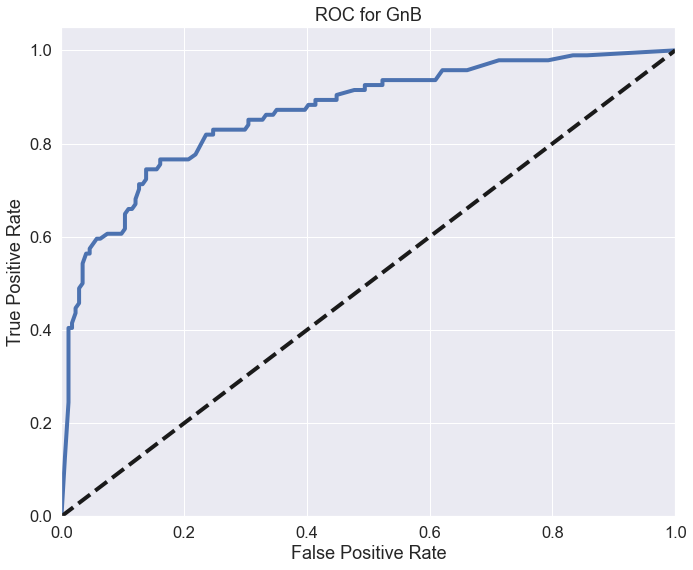

In [141]:

model_rf = rf.fit(X_train,y_train)
y_predict_proba = model_rf.predict_proba(X_test).tolist()
pro = np.array(y_predict_proba)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, pro)
    
plt.figure(figsize =[11,9])
plt.plot(fpr3, tpr3, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for GnB', fontsize= 18)
plt.show()

In [142]:
from sklearn.svm import SVC

In [143]:
svc = SVC()

In [144]:
svc.fit(X_train, y_train)

SVC()

In [145]:
y_pred_svc = svc.predict(X_test)
y_pred_svc

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

In [146]:
svc.score(X_train, y_train)

0.8154093097913323

In [147]:
svc_trainacc = round(svc.score(X_train, y_train)*100,2)
svc_trainacc

81.54

In [148]:
svc.score(X_test, y_test)

0.7947761194029851

In [149]:
svc_testacc = round(svc.score(X_test, y_test)*100,2)
svc_testacc

79.48

In [150]:
metrics.confusion_matrix(y_test, y_pred_svc)

array([[156,  18],
       [ 37,  57]], dtype=int64)

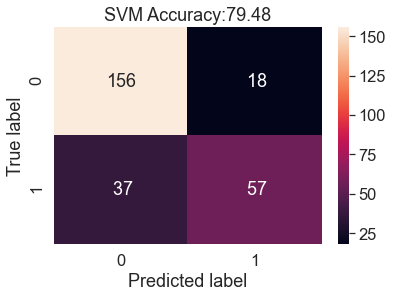

In [151]:
plt.figure(figsize=(6, 4))
sys.heatmap(metrics.confusion_matrix(y_test, y_pred_svc), annot=True, fmt = '3.0f')
plt.title('SVM Accuracy:{0:0}'.format(round(svc.score(X_test,y_test)*100,2)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [152]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       174
           1       0.76      0.61      0.67        94

    accuracy                           0.79       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.79      0.79      0.79       268



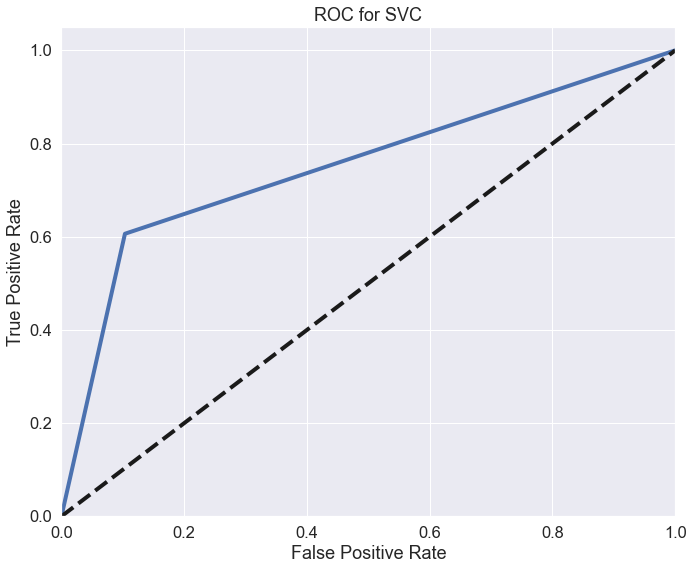

In [153]:
import sklearn.metrics as skm
fpr4, tpr4, thresholds = skm.roc_curve(y_test, y_pred_svc, pos_label=1)
roc_auc = skm.auc(fpr4, tpr4)
    
plt.figure(figsize =[11,9])
plt.plot(fpr4, tpr4, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for SVC', fontsize= 18)
plt.show()

In [154]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 
              'Random Forest','Support Vector Machines','random Forest ifeat'],
    'Score_train': [lr1_trainacc, knn_trainacc, gnb_trainacc,dtclf_trainacc, rf_trainacc, svc_trainacc, rf_trainacc2],
    'Score_test': [lr1_testacc, knn_testacc, gnb_testacc, dtclf_testacc, rf_testacc, svc_testacc,rf_testacc2]})


result_df = results.sort_values(by='Score_train', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score_train,Score_test
Model,,
Decision Tree,98.72,78.36
Random Forest,98.72,80.97
random Forest ifeat,88.20,39.91
KNN,83.79,82.09
Support Vector Machines,81.54,79.48
Logistic Regression,80.26,80.60
Naive Bayes,65.49,72.01


In [155]:
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(dt, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.66666667 0.79365079 0.82539683 0.75806452 0.70967742 0.72580645
 0.79032258 0.75806452 0.80645161 0.75806452]
Mean: 0.7592165898617511
Standard Deviation: 0.04572100708405537


In [156]:
X_train

array([[0.01985423, 3.        , 0.16666667, ..., 0.        , 1.        ,
        0.        ],
       [0.63558683, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.560191  , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.45966323, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.14551395, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.44709726, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [157]:
feature = data1[['Age', 'SibSp', 'Parch', 'Fare', 'Sex_cleaned_0',
       'Sex_cleaned_1', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_cleaned_0', 'Embarked_cleaned_1', 'Embarked_cleaned_2',
       'Embarked_cleaned_3']]
importance = np.round(dtclf.feature_importances_,5)

In [158]:
importances = pd.DataFrame({'feature': feature,'importance':np.round(dtclf.feature_importances_,5)})
importances = importances.sort_values('importance',ascending=False)
importances = importances.set_index(feature.columns)
importances.head(15)

,feature,importance
Age,"(A, g, e)",0.29727
SibSp,"(F, a, r, e)",0.27726
Parch,"(S, e, x, _, c, l, e, a, n, e, d, _, 0)",0.22355
Fare,"(P, c, l, a, s, s, _, 3)",0.07343
Sex_cleaned_0,"(P, a, r, c, h)",0.03604
Sex_cleaned_1,"(S, i, b, S, p)",0.03521
Pclass_1,"(P, c, l, a, s, s, _, 1)",0.02206
Pclass_2,"(E, m, b, a, r, k, e, d, _, c, l, e, a, n, e, ...",0.01980
Pclass_3,"(E, m, b, a, r, k, e, d, _, c, l, e, a, n, e, ...",0.00860
Embarked_cleaned_0,"(E, m, b, a, r, k, e, d, _, c, l, e, a, n, e, ...",0.00677


<AxesSubplot:>

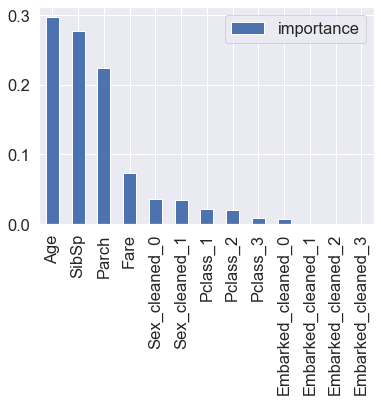

In [159]:
importances.plot.bar()